In [19]:
import numpy as np
import pandas as pd
import pydataset
from pydataset import data
import env
import os
import acquire 


# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data



### 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [3]:
df = data('iris')

In [5]:
#PRINT THE FIRST THREE ROWS
df.head(3)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [8]:
#PRINT THE NUMBER OF ROWS AND COLUMNS(SHAPE)
df.shape

(150, 5)

In [9]:
#Print the column names
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [10]:
#Print the data type of each column
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [12]:
#Print the summary statistics for each of th numeric values
## This method returns the summary statistics for numeric variables in my df.

stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [13]:
# calculate a range for each numeric variable and select certain columns of interest.

stats['range'] = stats['max'] - stats['min']
stats[['mean', '50%', 'std', 'range']]

,mean,50%,std,range
Sepal.Length,5.843333,5.80,0.828066,3.6
Sepal.Width,3.057333,3.00,0.435866,2.4
Petal.Length,3.758000,4.35,1.765298,5.9
Petal.Width,1.199333,1.30,0.762238,2.4


```python
#Would you reccomend rescaling the data based on these statistics
```
All of the numeric variables in the iris dataset are in the same unit of measure, cm, so I don't see a need to scale them.
IF there were a very large range in our feature values, even though they were measured in the same units, it might be beneficial to scale our data since a number of machine learning algorithms use a distance metric to weight feature importance.

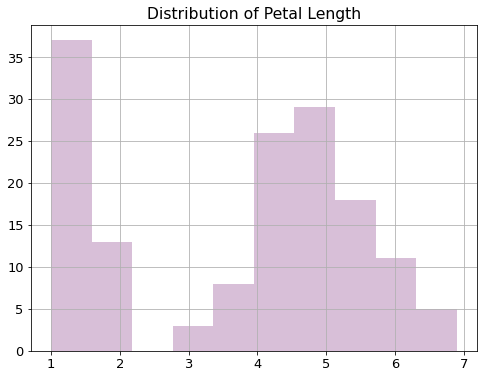

In [18]:
#quick visual of the variable distributions 

df['Petal.Length'].hist(color='thistle')

plt.title('Distribution of Petal Length')
plt.show()


### 2. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.



In [21]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name= 'Table1_CustDetails')
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [23]:
#Assign the first 100 rows to a new dtaframe, df_excel_Sample
df_excel_Sample = df_excel.head(100)
df_excel_Sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


In [31]:
#print the number of rows in your original data frame 
df_excel.shape[0]

7049

In [33]:
#Print the first 5 columns
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [35]:
#Print the column names that have a data type of object
df_excel.select_dtypes(include='object').head()

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


In [36]:
df_excel.select_dtypes(include='object').columns.to_list()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [37]:
#Compute the range for each of the numeric values
df_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [38]:
#select just the true numeric variables to declutter results.

telco_stats = df_excel[['monthly_charges', 'total_charges']].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [39]:
#range 
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


### 3. Read the data from <a href='https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'>this google sheet</a> into a dataframe, `df_google`

In [41]:
# Grab the Google sheet url.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [42]:
#Turn Google sheet addresss into a CSV export URL 
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [43]:
#read in the data using the pandas `pd.read_csv()` function

df_google = pd.read_csv(csv_export_url)

In [44]:
#print the first 3 rows 
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [45]:
# print the number of rows and columns 
df_google.shape

(891, 12)

In [47]:
# print the column names
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [49]:
# print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [50]:
# print the summary statistic for each of the numeric variables
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [51]:
# print the unique values for each of your categorical variables
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [52]:
#count of unique values for each variable with an object data type.

for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [54]:
#survived
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [55]:
#Passenger Class
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [56]:
#Sex
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [57]:
#Embarked
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

## Acquire.py test

In [24]:
#Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. 
# Obtain your data from the Codeup Data Science Database.
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [25]:
def new_titanic_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df

In [26]:
def get_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in titanic df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('titanic_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('titanic_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv file.
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    return df

In [27]:
titanic_df = get_titanic_data(cached=False)

In [28]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [29]:
#Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. 
#Obtain your data from the Codeup Data Science Database.
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [30]:
def get_iris_data(cached=False):
    '''
    This function reads in iris data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in iris df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('iris_df.csv') == False:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    return df


In [31]:
iris_df = get_iris_data(cached= False)

In [32]:
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


**Be sure to add titanic.csv and iris.csv to your .gitignore file**

### <font color='green'>Data Preperation Exercises</font>
* **Using Iris Data**

In [ ]:
# 1. Use the function defined in acquire.py to load the iris data.

In [33]:
df_iris = get_iris_data(cached= False)

In [34]:
df_iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [36]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
df_iris.shape

(150, 6)

In [40]:
df_iris.columns

Index(['species_id', 'species_name', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width'],
      dtype='object')

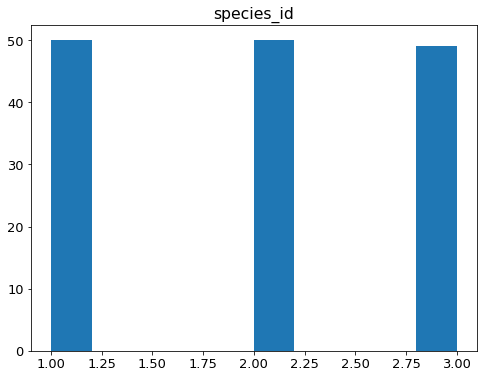

In [44]:
# Check out distributions of numeric columns.

num_cols = df_iris.columns[[df_iris[col].dtype == 'int64' for col in df_iris.columns]]
for col in num_cols:
    plt.hist(df_iris[col])
    plt.title(col)
    plt.show()

In [47]:
## Use .describe with object columns.

obj_cols = df_iris.columns[[df_iris[col].dtype == 'O' for col in df_iris.columns]]
for col in obj_cols:
    print(df_iris[col].value_counts())
    print(df_iris[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

versicolor    50
setosa        50
virginica     49
Name: species_name, dtype: int64
versicolor    0.335570
setosa        0.335570
virginica     0.328859
Name: species_name, dtype: float64
----------------------


In [48]:
# Create bins for petal_width using .value_counts.
# Using sort = false will sort by bin values as opposed to the frequency counts.
df_iris.petal_width.value_counts(bins=5, sort=False)

(0.0966, 0.58]    49
(0.58, 1.06]       8
(1.06, 1.54]      41
(1.54, 2.02]      28
(2.02, 2.5]       23
Name: petal_width, dtype: int64

In [49]:
# Find columns with missing values and the total of missing values.

missing = df_iris.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [ ]:
# document takeaways (nulls, datatypes to change, outliers, ideas for features, etc.)

In [55]:
# Drop duplicates...run just in case; reassign and check the shape of my data.

df_iris = df_iris.drop_duplicates()
df_iris.shape

(149, 7)

In [ ]:
# 2. Drop the species_id and measurement_id columns.

In [57]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
df_iris = df_iris.drop_duplicates()
df_iris.shape

(149, 7)

In [61]:
cols_to_drop = ['species_id']
df_iris = df_iris.drop(columns=cols_to_drop)
df_iris.shape

(149, 6)

In [62]:
# Validate that the columns are dropped.
df_iris.head(1)

,species_name,sepal_length,sepal_width,petal_length,petal_width,species
0,setosa,5.1,3.5,1.4,0.2,setosa


In [ ]:
# 3. Rename the species_name column to just species.

In [64]:
df_iris['species'] = df_iris.species_name

In [66]:
df_iris.head(1)

,species_name,sepal_length,sepal_width,petal_length,petal_width,species
0,setosa,5.1,3.5,1.4,0.2,setosa


In [ ]:
# 4. Create dummy variables of the species name.

In [68]:
dummies = pd.get_dummies(df_iris[['species']], drop_first=True) # df[['species']] -> dual brackets renames dummies species_{species}

In [69]:
df_iris = pd.concat([df_iris, dummies], axis=1)

In [ ]:
# 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.